In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("IPL.csv")
# print(df.head(5))

s1 checking data information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   match_id             74 non-null     int64 
 1   date                 74 non-null     object
 2   venue                74 non-null     object
 3   team1                74 non-null     object
 4   team2                74 non-null     object
 5   stage                74 non-null     object
 6   toss_winner          74 non-null     object
 7   toss_decision        74 non-null     object
 8   first_ings_score     74 non-null     int64 
 9   first_ings_wkts      74 non-null     int64 
 10  second_ings_score    74 non-null     int64 
 11  second_ings_wkts     74 non-null     int64 
 12  match_winner         74 non-null     object
 13  won_by               74 non-null     object
 14  margin               74 non-null     int64 
 15  player_of_the_match  74 non-null     object
 16  top_scorer

s2 checking rows and cols


In [4]:
print(f"no of rows are {df.shape[0]}, no of cols are {df.shape[1]}")

no of rows are 74, no of cols are 20


s3 checking not null value

In [5]:
df.isnull().sum()

match_id               0
date                   0
venue                  0
team1                  0
team2                  0
stage                  0
toss_winner            0
toss_decision          0
first_ings_score       0
first_ings_wkts        0
second_ings_score      0
second_ings_wkts       0
match_winner           0
won_by                 0
margin                 0
player_of_the_match    0
top_scorer             0
highscore              0
best_bowling           0
best_bowling_figure    0
dtype: int64

s4 finding wins by teams

Text(0, 0.5, 'Teams')

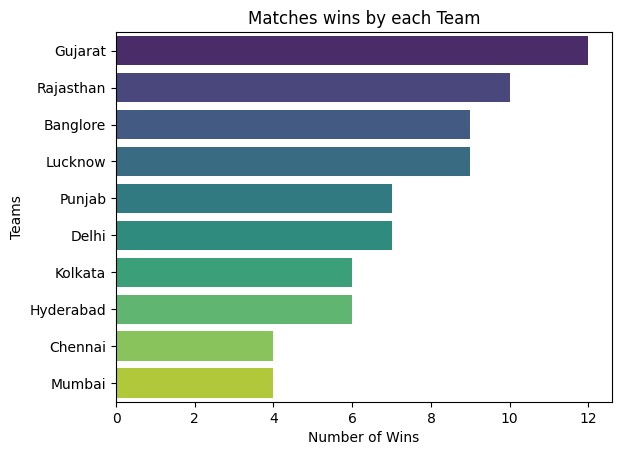

In [4]:
match_win=df['match_winner'].value_counts()
# print(mat_win)
sb.barplot(y=match_win.index, x=match_win.values,palette="viridis")
plt.title("Matches wins by each Team")
plt.xlabel("Number of Wins")
plt.ylabel("Teams")

s5 Toss Decision Trends

toss_decision
Field    59
Bat      15
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='toss_decision'>

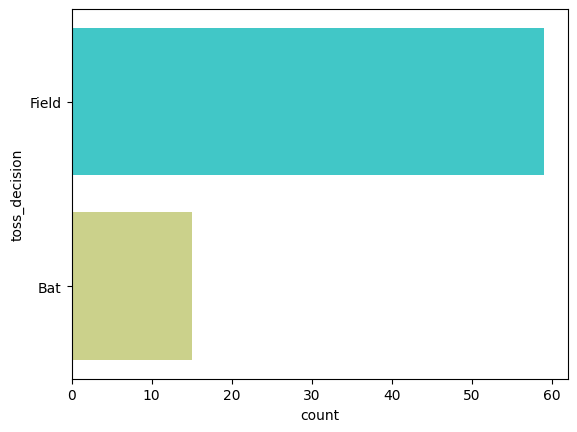

In [5]:
# print(df.toss_decision)
toss_des=df['toss_decision'].value_counts()
print(toss_des)
sb.countplot(df['toss_decision'],palette="rainbow")

s6 Toss Winner Vs Match Winner

In [ ]:

average=df[df['toss_winner']==df['match_winner']]['match_id'].count()
# print(average)
percent=(average*100)/df.shape[0]
print(percent)

48.648648648648646


s7 runs vs wickets in winning

<Axes: xlabel='won_by', ylabel='count'>

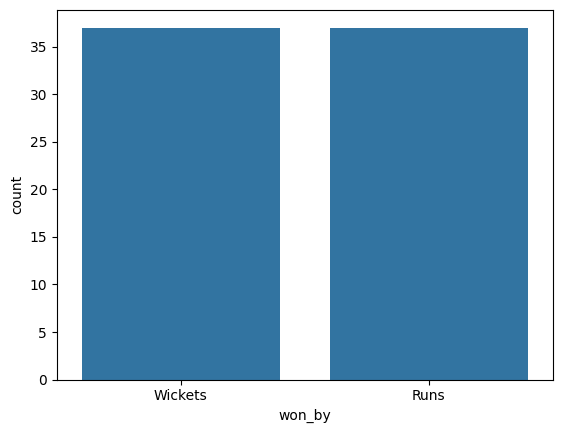

In [ ]:

sb.countplot(x=df['won_by'])

s8 Who Won most Player of the Match (P.O.M) Award

player_of_the_match
Kuldeep Yadav        4
Jos Buttler          3
Wanindu Hasaranga    2
Umesh Yadav          2
Quinton de Kock      2
Name: count, dtype: int64


<Axes: ylabel='player_of_the_match'>

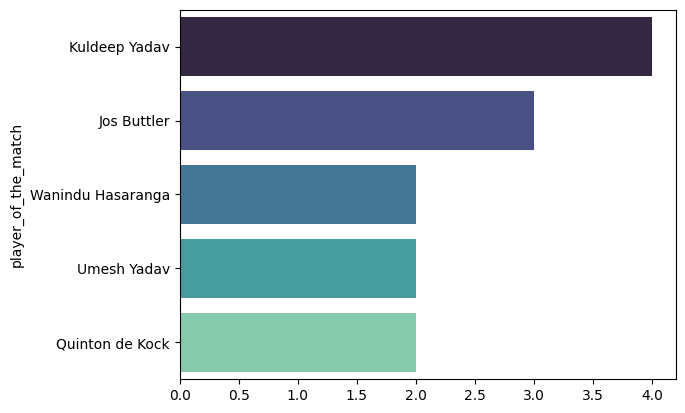

In [3]:
pom=df['player_of_the_match'].value_counts().head(5)
print(pom)
sb.barplot(y=pom.index,x=pom.values, palette="mako")

s9 top 2 Batsman with top Score

top_scorer
Jos Buttler        651
Quinton de Kock    377
Name: highscore, dtype: int64


<Axes: xlabel='top_scorer'>

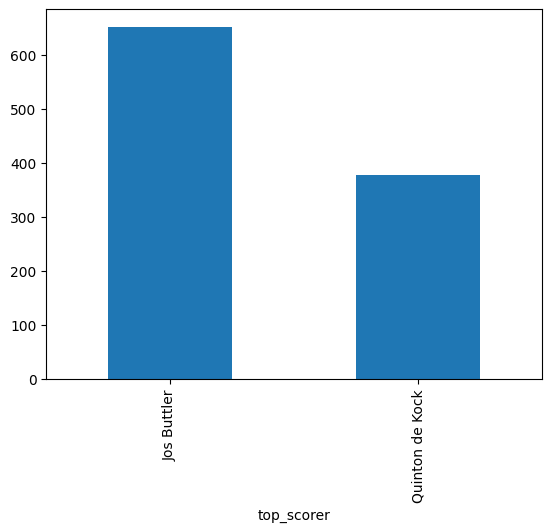

In [ ]:
high_score= df.groupby('top_scorer')['highscore'].sum().sort_values(ascending=False).head(2)
print(high_score)
high_score.plot(kind="bar")

s10 Top 10 Best Bowling Figure

best_bowling
Yuzvendra Chahal     17
Jasprit Bumrah       11
Kuldeep Yadav        11
Rashid Khan          11
Josh Hazlewood       10
Kagiso Rabada        10
Avesh Khan           10
Umran Malik           9
Wanindu Hasaranga     9
T Natarajan           8
Name: highest_wkt, dtype: int64


<Axes: ylabel='best_bowling'>

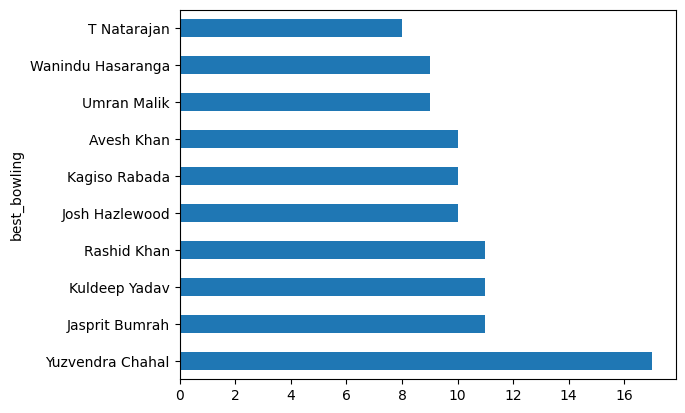

In [26]:
# print(df.info())
# bowl_fig=df.groupby("best_bowling")['best_bowling_figure'].sum().sort_values(ascending=False).head(10)
df['highest_wkt']=df['best_bowling_figure'].apply(lambda x:x.split('--')[0])
df['highest_wkt']=df['highest_wkt'].astype(int)
bowl_fig=df.groupby("best_bowling")['highest_wkt'].sum().sort_values(ascending=False).head(10)
print(bowl_fig)
bowl_fig.plot(kind="barh",)

s11 Venue with most matches

venue
Wankhede Stadium, Mumbai                        21
Dr DY Patil Sports Academy, Mumbai              20
Brabourne Stadium, Mumbai                       16
Maharashtra Cricket Association Stadium,Pune    13
Eden Gardens, Kolkata                            2
Narendra Modi Stadium, Ahmedabad                 2
Name: count, dtype: int64


<Axes: ylabel='venue'>

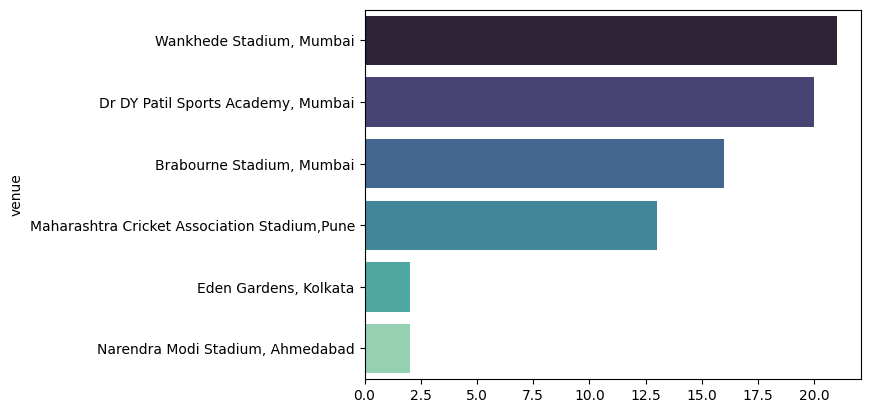

In [6]:
venue=df["venue"].value_counts()
print(venue)
sb.barplot(y=venue.index, x=venue.values,palette="mako")

s12 Who won game by highest margin

In [14]:
# won_margin=df.groupby('match_winner')['margin'].index().sort_values(ascending=False)
# print(won_margin)

df[df['won_by']== 'Runs'].sort_values(by='margin',ascending=False).head(1)[['match_winner','margin']]

,match_winner,margin
54,Chennai,91


s13 which player has highest individual score

In [19]:
df[df['highscore']==df['highscore'].max()][["top_scorer","highscore"]]

,top_scorer,highscore
65,Quinton de Kock,140


s14 which bowler has best bowling figure

In [30]:
df[df['highest_wkt']==df['highest_wkt'].max()][['best_bowling_figure','best_bowling']]

,best_bowling_figure,best_bowling
29,5--40,Yuzvendra Chahal
39,5--25,Umran Malik
53,5--18,Wanindu Hasaranga
55,5--10,Jasprit Bumrah
